In [17]:
import os
os.getcwd()

'c:\\Users\\azaan\\OneDrive\\Documents\\GitHub\\Data-Nerds'

## 1.88 wildfire dataset

In [18]:
# https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/code?select=FPA_FOD_20170508.sqlite

import pandas
import sqlite3

filepath = 'datasets\wildfire_data\FPA_FOD_20170508.sqlite'

# sqlite random testing
con = sqlite3.connect(filepath)
cur = con.cursor()

# execute var
cursor = cur.execute('SELECT * FROM spatial_ref_sys_aux;')
names = list(map(lambda x: x[0], cursor.description))
print(names)

# The result of a "cursor.execute" can be iterated over by row
i = 0
for row in cursor:
    print(row)
    i += 1
    if i > 100:
        break

OperationalError: no such table: spatial_ref_sys_aux

In [ ]:
#results: kinda a wash, that dataset is confusing

## USA+California Wildfire Data

In [ ]:
# https://www.kaggle.com/datasets/avkashchauhan/california-wildfire-dataset-from-2000-2021?resource=download

import pandas as pd
import sqlite3


filepath = 'datasets/wildfire_data/ca_wildfires/ca_daily_fire_2000_2021-v2.csv'
data = pd.read_csv(filepath)

data1 = data.copy(deep=True)
# print(data.columns)
# data.drop(columns='Date', inplace=True)

In [ ]:
import pandas as pd
%matplotlib inline

data1 = data.copy(deep=True)
print(data1.dtypes)
# convert date to date types
data1['acq_date'] = pd.to_datetime(data1['acq_date'])
# convert objects (categorical) into ordinal types
data1['satellite'] = data1['satellite'].map({'Terra': 1, 'Aqua': 2})
data1['instrument'] = data1['instrument'].map({'MODIS': 1, 'VIIRS':2})

# drop unnecessary data columns
data1.drop(columns=['year', 'month', 'type'], inplace=True)

print(data1.dtypes)
data1


latitude      float64
longitude     float64
acq_date       object
satellite      object
instrument     object
frp           float64
type            int64
bright_t31    float64
confidence      int64
year            int64
month           int64
dtype: object
latitude             float64
longitude            float64
acq_date      datetime64[ns]
satellite              int64
instrument             int64
frp                  float64
bright_t31           float64
confidence             int64
dtype: object


,latitude,longitude,acq_date,satellite,instrument,frp,bright_t31,confidence
0,32.4646,-114.6906,2011-06-29,1,1,91.1,315.7,84
1,32.4768,-114.6785,2011-10-11,1,1,96.2,313.7,100
2,32.4937,-114.7856,2013-02-06,1,1,26.9,296.1,65
3,32.4987,-114.7985,2010-02-04,1,1,22.2,282.9,62
4,32.5006,-114.7929,2009-07-08,2,1,172.0,316.4,78
...,...,...,...,...,...,...,...,...
221178,41.9998,-121.0237,2014-11-12,2,1,24.6,274.4,77
221179,41.9998,-120.7090,2012-08-13,1,1,74.1,310.7,97
221180,41.9998,-114.9167,2007-07-20,2,1,35.7,321.8,91
221181,41.9999,-123.5675,2018-07-30,1,1,18.2,295.8,62


In [ ]:
# scratch
print(data1['frp'].nlargest(100))
# print(data1['instrument'].value_counts())
# data1.plot.hist(by=['frp'], bins=12)
data1['confidence'].mean()
data1['frp'].mean()
data1['frp'].median()
data1.groupby(data1['acq_date'].dt.year)['bright_t31'].mean()
# data1.groupby['bright_t31']
# data1
print(data1.count())
(data1['confidence'] > 70).sum()
# (data1['confidence'] == 60).sum()

# the mean is higher than the median meaning positively skewed
# meaning that there are some HUGE wildfires!

109928    11944.2
368       11800.8
449       11528.3
27983     11488.0
27804     11486.3
           ...   
9595       5553.4
30996      5552.7
30304      5531.4
101812     5527.5
142352     5498.6
Name: frp, Length: 100, dtype: float64
latitude      221183
longitude     221183
acq_date      221183
satellite     221183
instrument    221183
frp           221183
bright_t31    221183
confidence    221183
dtype: int64


163517

In [ ]:
# I want to reduce columns so I am going to only keep confidence >75
data1 = data1[data1['confidence'] > 80]
data1.count()

# since the data here is not grouped by dates
# am going to aggregate the mean frp for each day
# and have a count of frp as # of wildfires per day
# and also have mean of the bright_t31 values
# and sum the values of the ordinal data (satellites, instruments) and split these into columns based on encoding

# ORRRR, should i just expand the values of the other dataset to fit here and just duplicate them??
# Procedures:
# 1. reduce rows in this dataset to be smaller, so can link to other by date
# 2. expand rows in other dataset to fit this one, so there are many duplicates of the temperature data

# data1['acq_date'].value_counts()
data1.groupby(data1['acq_date'])['frp'].mean()
data1.groupby(data1['acq_date'])['frp'].count()

acq_date
2000-11-02     4
2000-11-03     7
2000-11-05     2
2000-11-06     1
2000-11-07    18
              ..
2020-12-27     1
2020-12-28     3
2020-12-29     2
2020-12-30     5
2020-12-31     1
Name: frp, Length: 4825, dtype: int64

In [ ]:
data1

,latitude,longitude,acq_date,satellite,instrument,frp,bright_t31,confidence
0,32.4646,-114.6906,2011-06-29,1,1,91.1,315.7,84
1,32.4768,-114.6785,2011-10-11,1,1,96.2,313.7,100
9,32.5121,-114.7494,2009-07-08,2,1,322.8,316.5,90
10,32.5123,-114.7456,2009-07-08,2,1,310.5,316.6,90
12,32.5164,-114.8001,2007-10-27,1,1,136.0,282.5,100
...,...,...,...,...,...,...,...,...
221176,41.9996,-120.6638,2012-08-14,1,1,1717.1,364.8,100
221177,41.9998,-123.6422,2020-09-10,1,1,34.3,294.3,100
221179,41.9998,-120.7090,2012-08-13,1,1,74.1,310.7,97
221180,41.9998,-114.9167,2007-07-20,2,1,35.7,321.8,91


In [ ]:
newdata = data1.nlargest(2000, 'frp')
newdata = newdata.sort_values('acq_date')
extra_df = newdata.groupby('acq_date')['frp'].count()
newdata = newdata.groupby('acq_date').mean().reset_index()
newdata = newdata.merge(extra_df, on='acq_date')
newdata.sort_values('frp_y', ascending = False)


,acq_date,latitude,longitude,satellite,instrument,frp_x,bright_t31,confidence,frp_y
402,2020-09-08,39.590517,-122.127663,1.338346,1.0,3480.021805,331.343609,99.819549,133
403,2020-09-09,39.900057,-122.093553,1.231481,1.0,3130.175000,319.325926,100.000000,108
36,2003-10-26,33.622967,-117.464329,1.673469,1.0,3334.100000,321.630612,98.857143,49
386,2020-08-19,38.268541,-122.182417,1.195122,1.0,2972.404878,313.912195,99.414634,41
401,2020-09-07,37.687693,-119.893989,1.214286,1.0,2973.400000,349.810714,99.357143,28
...,...,...,...,...,...,...,...,...,...
207,2013-05-20,33.045800,-114.644000,1.000000,1.0,2126.200000,332.400000,100.000000,1
210,2013-06-29,39.052800,-116.224900,2.000000,1.0,3265.900000,400.100000,100.000000,1
217,2013-07-17,33.670700,-116.623600,2.000000,1.0,2186.800000,312.700000,94.000000,1
218,2013-07-26,37.279700,-119.303000,2.000000,1.0,2010.900000,306.200000,100.000000,1


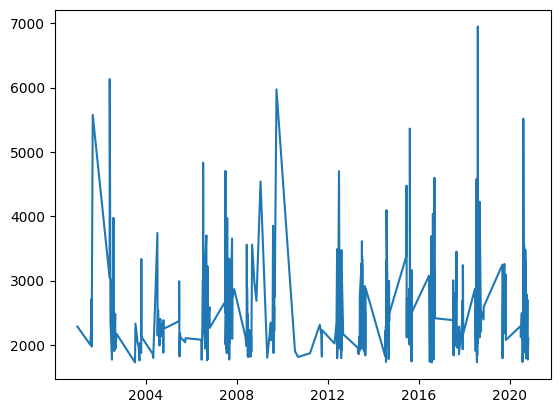

In [ ]:
import matplotlib.pyplot as plt

plt.plot(newdata['acq_date'], newdata['frp_x'])

In [ ]:
newdata.groupby(newdata['acq_date'].dt.year)['frp']

KeyError: 'Column not found: frp'

In [ ]:
# import matplotlib.pyplot as plt
# data1.plot(x="longitude", y="latitude", kind="scatter", c="frp")
newdata

,acq_date,latitude,longitude,satellite,instrument,frp_x,bright_t31,confidence,frp_y
0,2001-01-03,32.802900,-116.689200,1.0,1.0,2284.50,348.1000,100.0,1
1,2001-07-27,40.800400,-120.729850,1.0,1.0,2004.45,318.8000,100.0,2
2,2001-08-11,41.190550,-120.280650,1.0,1.0,2202.00,363.2000,100.0,2
3,2001-08-15,40.580425,-117.668837,1.0,1.0,2708.25,312.1875,100.0,8
4,2001-08-17,40.368800,-117.764800,1.0,1.0,2348.10,305.4000,100.0,1
...,...,...,...,...,...,...,...,...,...
424,2020-10-14,37.480100,-119.168200,2.0,1.0,2133.80,339.7000,87.0,1
425,2020-10-16,37.454700,-119.145400,1.0,1.0,1824.50,311.5000,100.0,1
426,2020-10-19,37.427050,-119.125250,2.0,1.0,1772.65,314.9000,100.0,2
427,2020-10-20,37.426400,-119.109900,2.0,1.0,1874.70,304.6000,100.0,1


In [ ]:
newdata.groupby(newdata['acq_date'].dt.year)['frp_y'].sum()

In [ ]:
newdata.to_csv('datasets/outputs/big_wildfires.csv', header=['date', 'latitude', 'longitude', 'satellite', 'instrument', 'avg_frp', 'surface_temp', 'confidence', 'fire_count'])